In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split


Маленький синтетический датасет:

In [32]:
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


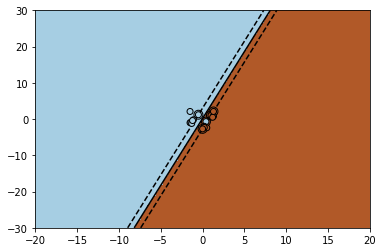

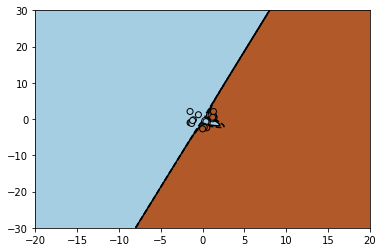

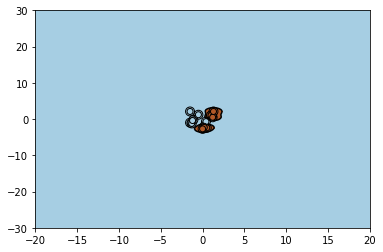

In [4]:
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)#stepen
    clf.fit(X, Y)

    plt.figure()

    #отображаем опорные вектора
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    
    #отображаем все точки датасета
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    #определяем границы
    x_min = -20
    x_max = 20
    y_min = -30
    y_max = 30
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
     
    #определяем решетку для покраски пространства
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    #считаем результаты классификации для всех точек решетки
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #отрисовываем линиии
   
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])

plt.show()

Задание:

1) Изобразите результат работы алгоритма на датасете **blobs**. Используйте линейное ядро, полиномиальное (степеней 2, 5, 10), и rbf.

2) Сравните время работы и точность алгоритмов svm и случайного леса на датасетах **spam** и **cancer**. Удобно нарисовать график. Полезно также сравнить время на еще большем датасете - например, из коллекции University of California Urvine - https://archive.ics.uci.edu/ml/datasets.php . 

In [5]:
import pandas as pd

In [24]:
data = pd.read_csv("blobs.csv")
data.head()

,x,y,label
0,0.543066,3.931424,0
1,2.563694,3.473101,0
2,0.665973,2.781159,0
3,3.552344,1.538645,1
4,1.397117,0.668682,1


In [45]:
X = np.array(data.drop('label', axis = 1).values).reshape(-1, 2)
Y = np.array(data['label'].values)

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

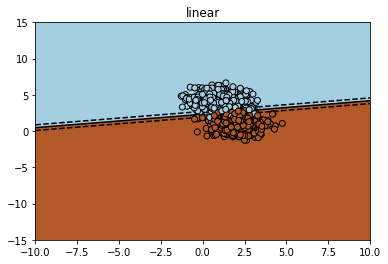

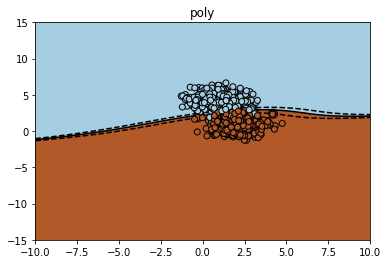

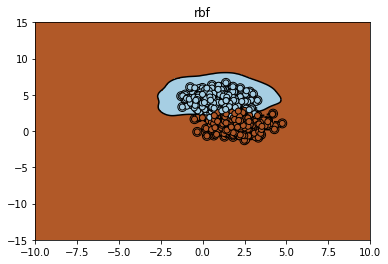

In [46]:
for kernel in ('linear', 'poly', 'rbf'):
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, gamma=2)#stepen
        for st in [2, 5, 10]:
            clf.fit(X, Y)

            plt.figure()

    #отображаем опорные вектора
            plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    
    #отображаем все точки датасета
            plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    #определяем границы
            x_min = -10
            x_max = 10
            y_min = -15
            y_max = 15
    plt.title(kernel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
     
    #определяем решетку для покраски пространства
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    #считаем результаты классификации для всех точек решетки
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #отрисовываем линиии
   
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])
    clf.fit(X, Y)

    plt.figure()

    #отображаем опорные вектора
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    
    #отображаем все точки датасета
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    #определяем границы
    x_min = -10
    x_max = 10
    y_min = -15
    y_max = 15
    plt.title(kernel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
     
    #определяем решетку для покраски пространства
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    #считаем результаты классификации для всех точек решетки
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #отрисовываем линиии
   
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])

plt.show()